# Elo Data EDA/ processing

In [772]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# I started by importing some of the essential packages

nfl = "../Data/nfl_elo_all.csv"
main_df = pd.read_csv(nfl)
main_df
# Here I imported my main elo_rating dataframe, which I labelled main_df and printed this out

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,26/09/1920,1920,0,NaN,RII,STP,1503.947000,1300.000000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,03/10/1920,1920,0,NaN,CBD,PTQ,1504.688000,1300.000000,0.825267,0.174733,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
2,03/10/1920,1920,0,NaN,CHI,MUT,1368.333000,1300.000000,0.682986,0.317014,...,NaN,NaN,NaN,NaN,NaN,20,0,NaN,NaN,NaN
3,03/10/1920,1920,0,NaN,RII,MUN,1516.108000,1478.004000,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN
4,03/10/1920,1920,0,NaN,DAY,COL,1493.002000,1504.908000,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17090,23/01/2022,2021,0,d,TB,LAR,1681.797158,1632.341105,0.659005,0.340995,...,379.027146,238.112249,199.786107,1629.446888,1635.265484,27,30,96.0,100.0,98.0
17091,23/01/2022,2021,0,d,KC,BUF,1699.470145,1683.332367,0.614689,0.385311,...,434.101421,308.598809,291.477231,1700.324756,1644.036577,42,36,100.0,100.0,100.0
17092,30/01/2022,2021,0,c,KC,CIN,1713.932369,1569.498961,0.769519,0.230481,...,153.972641,291.207245,186.971396,1674.943733,1585.098917,24,27,98.0,100.0,99.0
17093,30/01/2022,2021,0,c,LAR,SF,1651.615346,1621.465562,0.633608,0.366392,...,197.148060,204.657956,125.373817,1644.929010,1621.968494,20,17,96.0,100.0,98.0


In [773]:
mask = (main_df['season'] == 2020)
reg_season_mask = main_df['playoff'].isnull()   
elo_2020 = main_df[mask]   
elo_2020 = elo_2020[reg_season_mask]
elo_2020 = elo_2020.drop(['quality', 'importance', 'total_rating', 'neutral'], axis = 1)
elo_2020
#My aim in this project is to predict the regular season record for teams, so I dropped the playoff and superbowl data
#I also dropped some non essential columns

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
16541,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,0.751961,0.248039,250.964371,163.113859,240.822204,192.365616,1663.567048,1485.102109,34,20
16542,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,0.352055,0.647945,216.979032,266.985431,131.277712,166.760627,1420.368379,1489.892671,27,20
16543,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,0.444199,0.555801,188.318387,238.512620,192.712563,150.509484,1423.035870,1541.209626,23,27
16544,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,0.305872,0.694128,80.105529,-84.549663,87.907130,142.452589,1418.873053,1513.205823,27,17
16545,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,0.531452,0.468548,272.758643,487.232745,169.663822,207.789554,1519.869687,1580.152199,34,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,03/01/2021,2020,NaN,HOU,TEN,1405.446866,1590.293046,0.334058,0.665942,1396.663313,...,0.309814,0.690186,224.752531,241.915792,249.061903,216.955557,1371.350492,1571.696393,38,41
16793,03/01/2021,2020,NaN,DEN,OAK,1430.051399,1449.188398,0.565621,0.434379,1422.043277,...,0.532775,0.467225,216.114816,136.534184,115.047966,184.371418,1429.251280,1466.642505,31,32
16794,03/01/2021,2020,NaN,SF,SEA,1494.784619,1617.482789,0.417721,0.582279,1483.498926,...,0.390153,0.609847,172.799305,157.993876,109.845697,199.502627,1503.272522,1619.654067,23,26
16795,03/01/2021,2020,NaN,CHI,GB,1521.382026,1678.962501,0.369832,0.630168,1500.118465,...,0.339926,0.660074,235.974167,344.789454,164.839330,266.649955,1497.160456,1674.786093,16,35


In [774]:
elo_2021 = pd.read_csv("../Data/nfl_elo_latest.csv", header = 0)
#This data is from the same website, but only contains the 2021 elo_data
elo_2021.drop(['quality', 'importance', 'total_rating', 'neutral'], axis = 1, inplace = True)
reg_season_mask = elo_2021['playoff'].isnull()
elo_2021 = elo_2021[reg_season_mask]
elo_2021
#I repeated the processes for the 2020 elo_data on the 2021 elo_data

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,0.736090,0.263910,317.128566,397.401725,223.782352,248.082791,1639.815956,1500.264612,31,29
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,0.522245,0.477755,216.666972,246.652318,113.888998,192.992819,1500.541394,1580.083300,16,28
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,0.657171,0.342829,33.684565,302.017311,190.370826,225.696909,1489.651053,1528.361042,13,38
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,0.343427,0.656573,269.384920,175.216924,171.513676,132.495404,1355.200609,1562.414869,33,41
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,0.635255,0.364745,17.562049,382.369867,162.493070,145.813648,1418.481268,1475.793058,6,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-01-09,2021,NaN,LAR,SF,1636.561252,1554.970394,0.699274,0.300726,1615.789160,...,0.655596,0.344404,54.994140,142.511404,169.067416,140.972144,1597.459409,1580.112822,24,27
268,2022-01-09,2021,NaN,MIA,NE,1534.901453,1593.915459,0.508614,0.491386,1557.469225,...,0.479691,0.520309,207.911888,156.225506,130.904079,133.263355,1546.397530,1568.228525,33,24
269,2022-01-09,2021,NaN,TB,CAR,1664.443435,1370.835498,0.887386,0.112614,1670.677134,...,0.889954,0.110046,380.686593,174.037538,254.971182,66.767113,1639.622429,1356.555640,41,17
270,2022-01-09,2021,NaN,ATL,NO,1422.117870,1543.612249,0.419407,0.580593,1402.507563,...,0.405590,0.594410,84.406741,82.938797,118.434721,88.802173,1397.080391,1578.642541,20,30


# Elo_2020 EDA (checks and additions)

In [775]:
elo_2020.describe()

,season,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1_value_pre,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
count,256.0,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,2020.0,1506.877668,1503.553253,0.583449,0.416551,1502.858160,1507.572762,1507.830736,1507.398782,168.634752,...,0.542568,0.457432,180.770860,178.613221,169.848363,169.518611,1506.038083,1509.191434,24.816406,24.761719
std,0.0,102.209680,101.410260,0.176896,0.176896,104.280622,104.317166,96.816296,96.860519,60.926288,...,0.190760,0.190760,134.642785,140.996141,60.774286,57.620577,99.097038,100.081522,9.577009,10.148402
min,2020.0,1277.169211,1260.258714,0.171955,0.062979,1260.258714,1256.035345,1272.454637,1259.472090,0.000000,...,0.070229,0.066932,-210.655138,-215.313628,-13.569460,5.574399,1259.472090,1254.979451,0.000000,0.000000
25%,2020.0,1434.685028,1435.025201,0.454889,0.292197,1426.238406,1434.685028,1438.067378,1437.825194,125.989999,...,0.400486,0.308846,103.060474,88.225668,130.938386,128.264674,1430.500373,1440.121792,19.000000,17.000000
50%,2020.0,1509.534291,1501.547104,0.589708,0.410292,1500.695665,1504.693871,1509.122460,1510.045612,171.251819,...,0.541113,0.458887,181.086675,180.671404,173.101051,172.269047,1506.513808,1506.848359,24.500000,25.000000
75%,2020.0,1578.638773,1583.541692,0.707803,0.545111,1582.640587,1588.578397,1572.436771,1574.929520,213.996676,...,0.691154,0.599514,270.611802,275.681320,213.744357,210.675728,1578.119346,1578.436424,31.000000,31.000000
max,2020.0,1777.933310,1761.858581,0.937021,0.828045,1777.933310,1775.119369,1757.263199,1742.288173,313.828383,...,0.933068,0.929771,552.757798,600.417397,310.130678,313.828383,1757.263199,1754.511219,56.000000,49.000000


In [776]:
elo_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 16541 to 16796
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            256 non-null    object 
 1   season          256 non-null    int64  
 2   playoff         0 non-null      object 
 3   team1           256 non-null    object 
 4   team2           256 non-null    object 
 5   elo1_pre        256 non-null    float64
 6   elo2_pre        256 non-null    float64
 7   elo_prob1       256 non-null    float64
 8   elo_prob2       256 non-null    float64
 9   elo1_post       256 non-null    float64
 10  elo2_post       256 non-null    float64
 11  qbelo1_pre      256 non-null    float64
 12  qbelo2_pre      256 non-null    float64
 13  qb1             256 non-null    object 
 14  qb2             256 non-null    object 
 15  qb1_value_pre   256 non-null    float64
 16  qb2_value_pre   256 non-null    float64
 17  qb1_adj         256 non-null 

In [777]:
len(elo_2020)

256

In [778]:
elo_2020.shape

(256, 29)

In [779]:
print("elo_2020 team_1 unique teams: " + str(len(elo_2020.team1.unique())))
print("elo_2020 team_2 unique teams: " + str(len(elo_2020.team2.unique())))

elo_2020 team_1 unique teams: 32
elo_2020 team_2 unique teams: 32


In [780]:
elo_2020.isnull().sum()
#Playoff is expected to be null as it is the regular season

date                0
season              0
playoff           256
team1               0
team2               0
elo1_pre            0
elo2_pre            0
elo_prob1           0
elo_prob2           0
elo1_post           0
elo2_post           0
qbelo1_pre          0
qbelo2_pre          0
qb1                 0
qb2                 0
qb1_value_pre       0
qb2_value_pre       0
qb1_adj             0
qb2_adj             0
qbelo_prob1         0
qbelo_prob2         0
qb1_game_value      0
qb2_game_value      0
qb1_value_post      0
qb2_value_post      0
qbelo1_post         0
qbelo2_post         0
score1              0
score2              0
dtype: int64

In [781]:
((elo_2020.groupby('team1')['score1'].sum()) + (elo_2020.groupby('team2')['score2'].sum())).sort_values(ascending = False)
#Checking which teams scored the most points

team1
GB     509
BUF    501
TB     492
TEN    491
NO     482
KC     473
BAL    468
SEA    459
IND    451
OAK    434
MIN    430
PIT    416
ARI    410
CLE    408
MIA    404
ATL    396
DAL    395
LAC    384
HOU    384
DET    377
SF     376
LAR    372
CHI    372
CAR    350
WSH    335
PHI    334
NE     326
DEN    323
CIN    311
JAX    306
NYG    280
NYJ    243
dtype: int64

In [782]:
(((elo_2020.groupby('qb1')['qb1_value_pre'].mean()) + (elo_2020.groupby('qb2')['qb2_value_pre'].mean()))/2).sort_values(ascending = False)
#Most valuable Quaterbacks according to elo_ratings for 2020

Patrick Mahomes       277.653571
Drew Brees            249.223516
Dak Prescott          243.224347
Lamar Jackson         239.013100
Aaron Rodgers         231.384497
Russell Wilson        230.683866
Kyler Murray          230.486143
Deshaun Watson        220.564304
Josh Allen            216.378019
Ben Roethlisberger    213.536976
Ryan Tannehill        208.549474
Derek Carr            203.076160
Ryan Fitzpatrick      188.896455
Jared Goff            188.035740
Tom Brady             186.113840
Matt Ryan             181.303671
Teddy Bridgewater     177.147773
Justin Herbert        171.957378
Matthew Stafford      171.069331
Philip Rivers         170.556663
Kirk Cousins          154.446743
Cam Newton            153.279154
Mitchell Trubisky     143.550687
Alex Smith            142.415180
Nick Foles            141.703845
Gardner Minshew       137.977689
Baker Mayfield        135.197639
Carson Wentz          134.930686
Daniel Jones          132.006834
Joe Burrow            130.535879
Jimmy Garo

In [783]:
elo_2020['Elo-difference'] = elo_2020['elo1_pre'] - elo_2020['elo2_pre'] 
elo_2020['QB_Elo-difference'] = elo_2020['qb1_value_pre'] - elo_2020['qb2_value_pre'] 
#These are some of the predictors which i will eventually use to predict my target variable: Win(1) or Loss(0)
elo_2020

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference
16541,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,250.964371,163.113859,240.822204,192.365616,1663.567048,1485.102109,34,20,136.917204,44.079485
16542,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,216.979032,266.985431,131.277712,166.760627,1420.368379,1489.892671,27,20,-44.152193,-33.869194
16543,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,188.318387,238.512620,192.712563,150.509484,1423.035870,1541.209626,23,27,-119.995711,52.469446
16544,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,80.105529,-84.549663,87.907130,142.452589,1418.873053,1513.205823,27,17,-160.070082,-78.901087
16545,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,272.758643,487.232745,169.663822,207.789554,1519.869687,1580.152199,34,43,-11.318579,-18.531469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,03/01/2021,2020,NaN,HOU,TEN,1405.446866,1590.293046,0.334058,0.665942,1396.663313,...,224.752531,241.915792,249.061903,216.955557,1371.350492,1571.696393,38,41,-184.846180,37.580747
16793,03/01/2021,2020,NaN,DEN,OAK,1430.051399,1449.188398,0.565621,0.434379,1422.043277,...,216.114816,136.534184,115.047966,184.371418,1429.251280,1466.642505,31,32,-19.136999,-85.868351
16794,03/01/2021,2020,NaN,SF,SEA,1494.784619,1617.482789,0.417721,0.582279,1483.498926,...,172.799305,157.993876,109.845697,199.502627,1503.272522,1619.654067,23,26,-122.698170,-101.263859
16795,03/01/2021,2020,NaN,CHI,GB,1521.382026,1678.962501,0.369832,0.630168,1500.118465,...,235.974167,344.789454,164.839330,266.649955,1497.160456,1674.786093,16,35,-157.580475,-101.032328


In [784]:
elo_2020['Winner'] = (
    np.where(
        elo_2020['score1'] > elo_2020['score2'], 
        1, 
        np.where(elo_2020['score1'] < elo_2020['score2'], 0, 0)
    )
)
#I used the np.where function to create a column called Winner which displays 1 if team 1 won, or a 0 if team 2 won
#As I dont seek to predicts draws I set them to return a 0 which gives the win to team2 (away team)
elo_2020

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference,Winner
16541,10/09/2020,2020,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,1676.666068,...,163.113859,240.822204,192.365616,1663.567048,1485.102109,34,20,136.917204,44.079485,1
16542,13/09/2020,2020,NaN,JAX,IND,1438.502585,1482.654778,0.529966,0.470034,1457.867226,...,266.985431,131.277712,166.760627,1420.368379,1489.892671,27,20,-44.152193,-33.869194,1
16543,13/09/2020,2020,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,1391.331987,...,238.512620,192.712563,150.509484,1423.035870,1541.209626,23,27,-119.995711,52.469446,0
16544,13/09/2020,2020,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,1400.244413,...,-84.549663,87.907130,142.452589,1418.873053,1513.205823,27,17,-160.070082,-78.901087,1
16545,13/09/2020,2020,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,1543.920373,...,487.232745,169.663822,207.789554,1519.869687,1580.152199,34,43,-11.318579,-18.531469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,03/01/2021,2020,NaN,HOU,TEN,1405.446866,1590.293046,0.334058,0.665942,1396.663313,...,241.915792,249.061903,216.955557,1371.350492,1571.696393,38,41,-184.846180,37.580747,0
16793,03/01/2021,2020,NaN,DEN,OAK,1430.051399,1449.188398,0.565621,0.434379,1422.043277,...,136.534184,115.047966,184.371418,1429.251280,1466.642505,31,32,-19.136999,-85.868351,0
16794,03/01/2021,2020,NaN,SF,SEA,1494.784619,1617.482789,0.417721,0.582279,1483.498926,...,157.993876,109.845697,199.502627,1503.272522,1619.654067,23,26,-122.698170,-101.263859,0
16795,03/01/2021,2020,NaN,CHI,GB,1521.382026,1678.962501,0.369832,0.630168,1500.118465,...,344.789454,164.839330,266.649955,1497.160456,1674.786093,16,35,-157.580475,-101.032328,0


In [785]:
print('Elo difference correlation: ' + str(elo_2020.Winner.corr(elo_2020['Elo-difference'])))
print('Quaterback Elo difference correlation: ' + str(elo_2020.Winner.corr(elo_2020['QB_Elo-difference'])))

Elo difference correlation: 0.38059954630689724
Quaterback Elo difference correlation: 0.3037567259632265


# Elo_2021 EDA (checks and additions)

In [786]:
elo_2021.describe()

,season,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1_value_pre,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
count,272.0,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,2021.0,1506.469525,1502.801745,0.584775,0.415225,1503.311413,1505.959856,1504.710368,1500.707361,158.429115,...,0.581280,0.418720,160.363265,141.095133,158.622530,154.396180,1501.585082,1503.832646,23.838235,22.125000
std,0.0,100.584839,100.024105,0.176650,0.176650,101.496513,102.332405,94.017335,93.045509,57.807350,...,0.187426,0.187426,129.864741,142.011896,57.074368,62.196435,94.688440,96.113713,10.590479,10.057721
min,2021.0,1217.456406,1222.225724,0.125892,0.076822,1233.393097,1217.456406,1227.834387,1232.846190,3.343388,...,0.116039,0.062078,-207.503337,-293.851943,11.625346,-4.891621,1244.823574,1227.834387,0.000000,0.000000
25%,2021.0,1445.022333,1436.441523,0.471780,0.286409,1439.952941,1438.373772,1448.638616,1440.350962,119.355217,...,0.448530,0.279366,73.791355,51.899939,117.476284,116.296973,1455.080406,1440.571529,16.000000,14.750000
50%,2021.0,1513.530060,1506.387232,0.588229,0.411771,1510.387719,1514.091821,1512.922179,1507.989927,152.266934,...,0.603522,0.396478,156.636479,142.839589,152.632384,149.992519,1510.400407,1512.477584,23.000000,22.500000
75%,2021.0,1572.958579,1580.957221,0.713591,0.528220,1578.353429,1579.723471,1569.964990,1576.382372,205.644656,...,0.720634,0.551470,237.878359,227.423249,204.837493,202.511357,1574.056278,1579.503506,31.000000,30.000000
max,2021.0,1687.682015,1698.633239,0.923178,0.874108,1698.633239,1690.422283,1679.729776,1690.287674,269.532394,...,0.937922,0.883961,567.489608,492.760887,280.942209,269.532394,1690.287674,1679.791590,56.000000,51.000000


In [787]:
elo_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 271
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            272 non-null    object 
 1   season          272 non-null    int64  
 2   playoff         0 non-null      object 
 3   team1           272 non-null    object 
 4   team2           272 non-null    object 
 5   elo1_pre        272 non-null    float64
 6   elo2_pre        272 non-null    float64
 7   elo_prob1       272 non-null    float64
 8   elo_prob2       272 non-null    float64
 9   elo1_post       272 non-null    float64
 10  elo2_post       272 non-null    float64
 11  qbelo1_pre      272 non-null    float64
 12  qbelo2_pre      272 non-null    float64
 13  qb1             272 non-null    object 
 14  qb2             272 non-null    object 
 15  qb1_value_pre   272 non-null    float64
 16  qb2_value_pre   272 non-null    float64
 17  qb1_adj         272 non-null    flo

In [788]:
len(elo_2021)

272

In [789]:
elo_2021.shape

(272, 29)

In [790]:
print("elo_2021 team_1 unique teams: " + str(len(elo_2021.team1.unique())))
print("elo_2021 team_2 unique teams: " + str(len(elo_2021.team2.unique())))

elo_2021 team_1 unique teams: 32
elo_2021 team_2 unique teams: 32


In [791]:
elo_2021.isnull().sum()

date                0
season              0
playoff           272
team1               0
team2               0
elo1_pre            0
elo2_pre            0
elo_prob1           0
elo_prob2           0
elo1_post           0
elo2_post           0
qbelo1_pre          0
qbelo2_pre          0
qb1                 0
qb2                 0
qb1_value_pre       0
qb2_value_pre       0
qb1_adj             0
qb2_adj             0
qbelo_prob1         0
qbelo_prob2         0
qb1_game_value      0
qb2_game_value      0
qb1_value_post      0
qb2_value_post      0
qbelo1_post         0
qbelo2_post         0
score1              0
score2              0
dtype: int64

In [792]:
((elo_2021.groupby('team1')['score1'].sum()) + (elo_2021.groupby('team2')['score2'].sum())).sort_values(ascending = False)

team1
DAL    530
TB     511
BUF    483
KC     480
LAC    474
NE     462
LAR    460
CIN    460
IND    451
GB     450
ARI    449
PHI    444
SF     427
MIN    425
TEN    419
SEA    395
BAL    387
OAK    374
NO     364
CLE    349
PIT    343
MIA    341
WSH    335
DEN    335
DET    325
ATL    313
CHI    311
NYJ    310
CAR    304
HOU    280
NYG    258
JAX    253
dtype: int64

In [793]:
(((elo_2021.groupby('qb1')['qb1_value_pre'].mean()) + (elo_2021.groupby('qb2')['qb2_value_pre'].mean()))/2).sort_values(ascending = False)

Josh Allen          250.705209
Tom Brady           245.505168
Aaron Rodgers       243.287447
Patrick Mahomes     237.333814
Kyler Murray        227.576724
                       ...    
Nick Mullens               NaN
P.J. Walker                NaN
Ryan Fitzpatrick           NaN
Sean Mannion               NaN
Tim Boyle                  NaN
Length: 62, dtype: float64

In [794]:
elo_2021['Elo-difference'] = elo_2021['elo1_pre'] - elo_2021['elo2_pre'] 
elo_2021['QB_Elo-difference'] = elo_2021['qb1_value_pre'] - elo_2021['qb2_value_pre'] 
#These are some of the predictors which i will eventually use to predict my target variable: Win(1) or Loss(0)
elo_2021

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,317.128566,397.401725,223.782352,248.082791,1639.815956,1500.264612,31,29,203.811694,-18.081249
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,216.666972,246.652318,113.888998,192.992819,1500.541394,1580.083300,16,28,-4.261051,-84.561430
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,33.684565,302.017311,190.370826,225.696909,1489.651053,1528.361042,13,38,66.960262,-9.436454
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,269.384920,175.216924,171.513676,132.495404,1355.200609,1562.414869,33,41,-100.020702,32.890525
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,17.562049,382.369867,162.493070,145.813648,1418.481268,1475.793058,6,32,58.027645,59.066894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-01-09,2021,NaN,LAR,SF,1636.561252,1554.970394,0.699274,0.300726,1615.789160,...,54.994140,142.511404,169.067416,140.972144,1597.459409,1580.112822,24,27,81.590858,40.941109
268,2022-01-09,2021,NaN,MIA,NE,1534.901453,1593.915459,0.508614,0.491386,1557.469225,...,207.911888,156.225506,130.904079,133.263355,1546.397530,1568.228525,33,24,-59.014006,-8.364348
269,2022-01-09,2021,NaN,TB,CAR,1664.443435,1370.835498,0.887386,0.112614,1670.677134,...,380.686593,174.037538,254.971182,66.767113,1639.622429,1356.555640,41,17,293.607937,186.154625
270,2022-01-09,2021,NaN,ATL,NO,1422.117870,1543.612249,0.419407,0.580593,1402.507563,...,84.406741,82.938797,118.434721,88.802173,1397.080391,1578.642541,20,30,-121.494378,32.761948


In [795]:
elo_2021['Winner'] = (
    np.where(
        elo_2021['score1'] > elo_2021['score2'], 
        1, 
        np.where(elo_2021['score1'] < elo_2021['score2'], 0, 0)
    )
)
#I used the np.where function to create a column called Winner which displays 1 if team 1 won, or a 0 if team 2 won
#As I dont seek to predicts draws I set them to return a 0 which gives the win to team2 (away team)
elo_2021

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,Elo-difference,QB_Elo-difference,Winner
0,2021-09-09,2021,NaN,TB,DAL,1656.235930,1452.424236,0.824539,0.175461,1659.671437,...,397.401725,223.782352,248.082791,1639.815956,1500.264612,31,29,203.811694,-18.081249,1
1,2021-09-12,2021,NaN,IND,SEA,1561.490084,1565.751134,0.586531,0.413469,1530.547371,...,246.652318,113.888998,192.992819,1500.541394,1580.083300,16,28,-4.261051,-84.561430,0
2,2021-09-12,2021,NaN,TEN,ARI,1553.397217,1486.436956,0.681272,0.318728,1506.171519,...,302.017311,190.370826,225.696909,1489.651053,1528.361042,13,38,66.960262,-9.436454,0
3,2021-09-12,2021,NaN,DET,SF,1390.645249,1490.665951,0.449771,0.550229,1371.189983,...,175.216924,171.513676,132.495404,1355.200609,1562.414869,33,41,-100.020702,32.890525,0
4,2021-09-12,2021,NaN,ATL,PHI,1484.493617,1426.465972,0.670004,0.329996,1437.713081,...,382.369867,162.493070,145.813648,1418.481268,1475.793058,6,32,58.027645,59.066894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2022-01-09,2021,NaN,LAR,SF,1636.561252,1554.970394,0.699274,0.300726,1615.789160,...,142.511404,169.067416,140.972144,1597.459409,1580.112822,24,27,81.590858,40.941109,0
268,2022-01-09,2021,NaN,MIA,NE,1534.901453,1593.915459,0.508614,0.491386,1557.469225,...,156.225506,130.904079,133.263355,1546.397530,1568.228525,33,24,-59.014006,-8.364348,1
269,2022-01-09,2021,NaN,TB,CAR,1664.443435,1370.835498,0.887386,0.112614,1670.677134,...,174.037538,254.971182,66.767113,1639.622429,1356.555640,41,17,293.607937,186.154625,1
270,2022-01-09,2021,NaN,ATL,NO,1422.117870,1543.612249,0.419407,0.580593,1402.507563,...,82.938797,118.434721,88.802173,1397.080391,1578.642541,20,30,-121.494378,32.761948,0


In [796]:
print('Elo difference correlation: ' + str(elo_2021.Winner.corr(elo_2021['Elo-difference'])))
print('Quaterback Elo difference correlation: ' + str(elo_2021.Winner.corr(elo_2021['QB_Elo-difference'])))

Elo difference correlation: 0.28482091969426676
Quaterback Elo difference correlation: 0.3236172631583046


# Stats data 

In [797]:
stats = pd.read_csv("../Data/nfl_pass_rush_receive_raw_data.csv", header = 0)
stats.drop(['player_id', 'Vegas_Line', 'Vegas_Favorite', 'Over_Under'], inplace=True, axis=1)
stats

,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
0,201909050chi,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
1,201909050chi,RB,Aaron Jones,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
2,201909050chi,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
3,201909050chi,WR,Davante Adams,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
4,201909050chi,TE,Jimmy Graham,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,202202130cin,WR,Brandon Powell,LAR,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19969,202202130cin,RB,Buddy Howell,LAR,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19970,202202130cin,TE,Drew Sample,CIN,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19971,202202130cin,WR,Trent Taylor,CIN,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13


In [798]:
stats['game_date'] = pd.to_datetime(stats.game_date)
start_20 = '9/10/2020'
end_20 = '1/3/2021'
mask = (stats['game_date'] >= start_20) & (stats['game_date'] <= end_20)
stats_2020 = stats.loc[mask]
stats_2020

,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
6330,202009100kan,QB,Deshaun Watson,HOU,20,32,253,1,1,4,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
6331,202009100kan,RB,David Johnson,HOU,0,0,0,0,0,0,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
6332,202009100kan,RB,Duke Johnson,HOU,0,0,0,0,0,0,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
6333,202009100kan,WR,Will Fuller,HOU,0,0,0,0,0,0,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
6334,202009100kan,TE,Jordan Akins,HOU,0,0,0,0,0,0,...,KAN,20,34,False,outdoors,astroturf,56,95,7,2020-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,202101030tam,TE,Antony Auclair,TAM,0,0,0,0,0,0,...,TAM,27,44,False,outdoors,grass,65,77,4,2021-01-03
12646,202101030tam,WR,Jaydon Mickens,TAM,0,0,0,0,0,0,...,TAM,27,44,False,outdoors,grass,65,77,4,2021-01-03
12647,202101030tam,RB,Ke'Shawn Vaughn,TAM,0,0,0,0,0,0,...,TAM,27,44,False,outdoors,grass,65,77,4,2021-01-03
12648,202101030tam,TE,Cameron Brate,TAM,0,0,0,0,0,0,...,TAM,27,44,False,outdoors,grass,65,77,4,2021-01-03


In [799]:
start_21 = '9/9/2021'
end_21 = '1/9/2022'
mask = (stats['game_date'] >= start_21) & (stats['game_date'] <= end_21)
stats_2021 = stats.loc[mask]
stats_2021

,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
12960,202109090tam,QB,Dak Prescott,DAL,42,58,403,3,1,1,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
12961,202109090tam,RB,Ezekiel Elliott,DAL,0,0,0,0,0,0,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
12962,202109090tam,RB,Tony Pollard,DAL,0,0,0,0,0,0,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
12963,202109090tam,WR,Amari Cooper,DAL,0,0,0,0,0,0,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
12964,202109090tam,WR,CeeDee Lamb,DAL,0,0,0,0,0,0,...,TAM,29,31,False,outdoors,grass,82,85,9,2021-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19667,202201090tam,TE,Ian Thomas,CAR,0,0,0,0,0,0,...,TAM,17,41,False,outdoors,grass,80,99,4,2022-01-09
19668,202201090tam,TE,Stephen Sullivan,CAR,0,0,0,0,0,0,...,TAM,17,41,False,outdoors,grass,80,99,4,2022-01-09
19669,202201090tam,WR,Cyril Grayson,TAM,0,0,0,0,0,0,...,TAM,17,41,False,outdoors,grass,80,99,4,2022-01-09
19670,202201090tam,TE,O.J. Howard,TAM,0,0,0,0,0,0,...,TAM,17,41,False,outdoors,grass,80,99,4,2022-01-09


# Stats 2020 EDA/ Processing

In [827]:
len(stats_2020.team.unique())
stats_2020.team.unique()

array(['HOU', 'KAN', 'SEA', 'ATL', 'NYJ', 'BUF', 'LVR', 'CAR', 'CIN',
       'LAC', 'CHI', 'DET', 'IND', 'JAX', 'MIN', 'GNB', 'NOR', 'TAM',
       'NWE', 'MIA', 'DAL', 'LAR', 'CLE', 'BAL', 'SFO', 'ARI', 'WAS',
       'PHI', 'TEN', 'DEN', 'NYG', 'PIT'], dtype=object)

In [830]:
elo_2020.team1.unique()
#There are differences in the team names: (stats_2020: NWE, elo_2020: NE), so will make them all the same (I will use the elo_2020 teams)

array(['KC', 'JAX', 'DET', 'WSH', 'MIN', 'BUF', 'ATL', 'NE', 'BAL', 'CAR',
       'CIN', 'NO', 'SF', 'LAR', 'NYG', 'DEN', 'CLE', 'PIT', 'TEN', 'TB',
       'CHI', 'GB', 'IND', 'PHI', 'NYJ', 'MIA', 'DAL', 'ARI', 'HOU',
       'LAC', 'SEA', 'OAK'], dtype=object)

In [833]:
stats_2020['team'] = stats_2020['team'].replace(['HOU', 'SEA', 'NYJ', 'LVR', 'CIN', 'CHI', 'IND', 'MIN', 'NOR',
       'NWE', 'DAL', 'CLE', 'SFO', 'WAS', 'TEN', 'NYG', 'ATL', 'DET',
       'BUF', 'JAX', 'PHI', 'DEN', 'KAN', 'CAR', 'MIA', 'LAR', 'TAM',
       'GNB', 'BAL', 'ARI', 'LAC', 'PIT'], 
        ['HOU', 'SEA', 'NYJ', 'OAK', 'CIN', 'CHI', 'IND', 'MIN', 'NO', 'NE',
       'DAL', 'CLE', 'SF', 'WSH', 'TEN', 'NYG', 'ATL', 'DET', 'BUF', 'JAX',
       'PHI', 'DEN', 'KC', 'CAR', 'MIA', 'LAR', 'TB', 'GB', 'BAL',
       'ARI', 'LAC', 'PIT'])
stats_2021['team'] = stats_2021['team'].replace(['HOU', 'SEA', 'NYJ', 'LVR', 'CIN', 'CHI', 'IND', 'MIN', 'NOR',
       'NWE', 'DAL', 'CLE', 'SFO', 'WAS', 'TEN', 'NYG', 'ATL', 'DET',
       'BUF', 'JAX', 'PHI', 'DEN', 'KAN', 'CAR', 'MIA', 'LAR', 'TAM',
       'GNB', 'BAL', 'ARI', 'LAC', 'PIT'], 
        ['HOU', 'SEA', 'NYJ', 'OAK', 'CIN', 'CHI', 'IND', 'MIN', 'NO', 'NE',
       'DAL', 'CLE', 'SF', 'WSH', 'TEN', 'NYG', 'ATL', 'DET', 'BUF', 'JAX',
       'PHI', 'DEN', 'KC', 'CAR', 'MIA', 'LAR', 'TB', 'GB', 'BAL',
       'ARI', 'LAC', 'PIT'])
#I replaced both dataframes team names just for ease

In [834]:
stats_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 6330 to 12649
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   game_id                       6320 non-null   object        
 1   pos                           6320 non-null   object        
 2   player                        6320 non-null   object        
 3   team                          6320 non-null   object        
 4   pass_cmp                      6320 non-null   int64         
 5   pass_att                      6320 non-null   int64         
 6   pass_yds                      6320 non-null   int64         
 7   pass_td                       6320 non-null   int64         
 8   pass_int                      6320 non-null   int64         
 9   pass_sacked                   6320 non-null   int64         
 10  pass_sacked_yds               6320 non-null   int64         
 11  pass_long                 

In [835]:
stats_2020.describe()

,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,rec_air_yds,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,Temperature,Humidity,Wind_Speed
count,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,...,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,1.860127,2.850949,20.648734,0.137816,0.062500,0.179589,1.193513,3.361392,9.174858,2.182278,...,21.786044,9.428797,0.129589,32.451424,48.343354,24.847943,24.798101,63.284810,56.930380,5.490823
std,6.375475,9.664163,71.343222,0.568320,0.316331,0.738596,5.132681,11.356685,29.020078,4.667756,...,36.496896,14.676735,0.387506,21.875560,31.645811,10.205182,9.651913,14.575609,17.802709,6.142702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-31.900000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,19.000000,17.000000,19.000000,52.000000,45.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,30.000000,46.000000,25.000000,25.000000,72.000000,48.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,31.200000,14.000000,0.000000,50.000000,77.000000,31.000000,31.000000,72.000000,71.000000,8.000000
max,41.000000,61.000000,502.000000,5.000000,4.000000,8.000000,62.000000,92.000000,158.300000,34.000000,...,254.400000,141.000000,6.000000,98.000000,100.000000,49.000000,56.000000,90.000000,97.000000,35.000000


<AxesSubplot:>

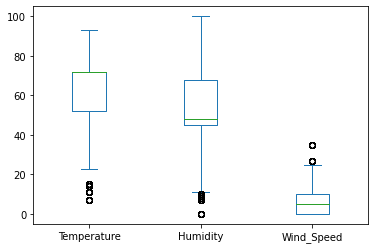

In [836]:
features = ['Temperature', 'Humidity', 'Wind_Speed']
stats[features].plot(kind = 'box')

In [837]:
stats_2020.dtypes

game_id                object
pos                    object
player                 object
team                   object
pass_cmp                int64
                    ...      
Surface                object
Temperature             int64
Humidity                int64
Wind_Speed              int64
game_date      datetime64[ns]
Length: 65, dtype: object

In [838]:
stats_2020.isnull().sum()

game_id        0
pos            0
player         0
team           0
pass_cmp       0
              ..
Surface        0
Temperature    0
Humidity       0
Wind_Speed     0
game_date      0
Length: 65, dtype: int64

In [839]:
stats_2020.Surface.unique()
#There are 2 instances of fieldturf: one has a space, I'll merge them by replacing the spaced one

array(['astroturf', 'fieldturf', 'grass', 'sportturf', 'matrixturf'],
      dtype=object)

In [840]:
stats_2020.Surface.replace('fieldturf ', 'fieldturf', inplace = True)
stats_2020.Surface.unique()

array(['astroturf', 'fieldturf', 'grass', 'sportturf', 'matrixturf'],
      dtype=object)

In [841]:
temps_2020 = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    temps_2020.append(int(masked_df.iloc[[0]].Temperature))

In [842]:
winds_2020 = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    winds_2020.append(int(masked_df.iloc[[0]].Wind_Speed))

In [843]:
from itertools import groupby
home_tem2020 = []
home_team2020 = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    home_tem2020.append(str(masked_df.iloc[[0]].home_team))
for s in home_tem2020:
    t = s.split('\n')[0]
    res = [''.join(g) for _, g in groupby(t, str.isalpha)]
    home_team2020.append(res[1])
print(home_team2020)

['KAN', 'ATL', 'BUF', 'CAR', 'CIN', 'DET', 'JAX', 'MIN', 'NOR', 'NWE', 'LAR', 'BAL', 'SFO', 'WAS', 'DEN', 'NYG', 'CLE', 'CHI', 'IND', 'ARI', 'DAL', 'GNB', 'HOU', 'MIA', 'NYJ', 'TEN', 'PHI', 'PIT', 'LAC', 'SEA', 'TAM', 'LVR', 'JAX', 'ATL', 'BUF', 'CLE', 'IND', 'ARI', 'DEN', 'MIN', 'NOR', 'NWE', 'NYG', 'PHI', 'PIT', 'LAC', 'SEA', 'BAL', 'NYJ', 'CAR', 'CHI', 'CIN', 'DAL', 'DET', 'HOU', 'MIA', 'LVR', 'LAR', 'SFO', 'TAM', 'WAS', 'GNB', 'KAN', 'CHI', 'ATL', 'CLE', 'DAL', 'HOU', 'KAN', 'NYJ', 'PIT', 'BAL', 'SEA', 'SFO', 'WAS', 'NOR', 'TEN', 'CAR', 'IND', 'JAX', 'MIA', 'MIN', 'NWE', 'NYG', 'TEN', 'PHI', 'PIT', 'SFO', 'TAM', 'BUF', 'DAL', 'PHI', 'ATL', 'CIN', 'ARI', 'DEN', 'HOU', 'NOR', 'NWE', 'NYJ', 'TEN', 'LVR', 'LAC', 'WAS', 'LAR', 'CAR', 'BUF', 'CHI', 'CIN', 'CLE', 'DEN', 'DET', 'GNB', 'KAN', 'MIA', 'PHI', 'BAL', 'SEA', 'NYG', 'SFO', 'ATL', 'BUF', 'IND', 'ARI', 'DAL', 'JAX', 'KAN', 'MIN', 'TEN', 'LAC', 'TAM', 'WAS', 'NYJ', 'TEN', 'CAR', 'CLE', 'ARI', 'DET', 'GNB', 'MIA', 'NOR', 'NWE', 'NYG'

In [844]:
surf_2020 = []
surface_2020 = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    surf_2020.append(str(masked_df.iloc[[0]].Surface))
for s in surf_2020:
    t = s.split('\n')[0]
    res = [''.join(g) for _, g in groupby(t, str.isalpha)]
    surface_2020.append(res[1])
print(len(surface_2020))

256


In [845]:
tems = []
for s in stats_2020.game_id.unique():
    mask = stats_2020['game_id'] == s
    masked_df = stats_2020[mask]
    tems.append(str(masked_df.team.unique()))
team1 = []
team2 = []
for t in tems:
    p = t.split("'")
    x = str(p[1])
    y = str(p[3])
    team1.append(x)
    team2.append(y)
print(team2)

['KC', 'ATL', 'BUF', 'CAR', 'LAC', 'DET', 'JAX', 'GB', 'TB', 'MIA', 'LAR', 'BAL', 'ARI', 'PHI', 'DEN', 'PIT', 'CIN', 'CHI', 'MIN', 'ARI', 'DAL', 'GB', 'BAL', 'MIA', 'NYJ', 'TEN', 'LAR', 'PIT', 'LAC', 'SEA', 'TB', 'NO', 'JAX', 'ATL', 'BUF', 'CLE', 'IND', 'ARI', 'DEN', 'MIN', 'NO', 'NE', 'NYG', 'PHI', 'PIT', 'LAC', 'SEA', 'KC', 'NYJ', 'CAR', 'IND', 'CIN', 'DAL', 'DET', 'HOU', 'MIA', 'OAK', 'LAR', 'SF', 'TB', 'WSH', 'GB', 'NE', 'CHI', 'ATL', 'CLE', 'DAL', 'HOU', 'KC', 'NYJ', 'PIT', 'BAL', 'SEA', 'MIA', 'LAR', 'LAC', 'TEN', 'CAR', 'IND', 'DET', 'MIA', 'MIN', 'NE', 'NYG', 'TEN', 'BAL', 'CLE', 'SF', 'GB', 'KC', 'DAL', 'PHI', 'ATL', 'CIN', 'ARI', 'DEN', 'GB', 'NO', 'NE', 'BUF', 'TEN', 'OAK', 'LAC', 'WSH', 'LAR', 'ATL', 'BUF', 'NO', 'TEN', 'CLE', 'DEN', 'DET', 'GB', 'KC', 'LAR', 'PHI', 'PIT', 'SEA', 'NYG', 'SF', 'ATL', 'BUF', 'IND', 'ARI', 'DAL', 'JAX', 'KC', 'MIN', 'TEN', 'LAC', 'TB', 'WSH', 'NE', 'TEN', 'TB', 'CLE', 'ARI', 'DET', 'GB', 'MIA', 'NO', 'NE', 'NYG', 'PIT', 'DEN', 'LAR', 'CHI', 'S

In [846]:
statsDF_2020 = pd.DataFrame()
statsDF_2020['team1'] = team1
statsDF_2020['team2'] = team2
statsDF_2020['Temp'] = temps_2020
statsDF_2020['Wind_speed'] = winds_2020
statsDF_2020['surface'] = surface_2020
statsDF_2020['home_team'] = home_team2020
statsDF_2020.head(20)

,team1,team2,Temp,Wind_speed,surface,home_team
0,HOU,KC,56,7,astroturf,KAN
1,SEA,ATL,72,0,fieldturf,ATL
2,NYJ,BUF,67,15,astroturf,BUF
3,OAK,CAR,81,5,grass,CAR
4,CIN,LAC,83,6,grass,CIN
5,CHI,DET,72,0,fieldturf,DET
6,IND,JAX,80,3,grass,JAX
7,MIN,GB,72,0,sportturf,MIN
8,NO,TB,72,0,astroturf,NOR
9,NE,MIA,70,8,grass,NWE


In [847]:
statsDF_2020['team1_home_A'] = (
    np.where(
    statsDF_2020['team1'] == statsDF_2020['home_team'], 1,
       0)
)
statsDF_2020.drop('home_team', axis = 1, inplace = True)
statsDF_2020

,team1,team2,Temp,Wind_speed,surface,team1_home_A
0,HOU,KC,56,7,astroturf,0
1,SEA,ATL,72,0,fieldturf,0
2,NYJ,BUF,67,15,astroturf,0
3,OAK,CAR,81,5,grass,0
4,CIN,LAC,83,6,grass,1
...,...,...,...,...,...,...
251,DAL,NYG,33,6,fieldturf,0
252,WSH,PHI,38,10,grass,0
253,ARI,LAR,72,0,matrixturf,0
254,SEA,SF,72,0,grass,0


In [848]:
dummies = pd.get_dummies(statsDF_2020.surface)
statsDF_2020 = pd.concat([statsDF_2020, dummies], axis=1)
statsDF_2020 = statsDF_2020.drop('surface', axis = 1)
statsDF_2020

,team1,team2,Temp,Wind_speed,team1_home_A,astroturf,fieldturf,grass,matrixturf,sportturf
0,HOU,KC,56,7,0,1,0,0,0,0
1,SEA,ATL,72,0,0,0,1,0,0,0
2,NYJ,BUF,67,15,0,1,0,0,0,0
3,OAK,CAR,81,5,0,0,0,1,0,0
4,CIN,LAC,83,6,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
251,DAL,NYG,33,6,0,0,1,0,0,0
252,WSH,PHI,38,10,0,0,0,1,0,0
253,ARI,LAR,72,0,0,0,0,0,1,0
254,SEA,SF,72,0,0,0,0,1,0,0
